# LOAN APPLICATION STATUS PREDICTION


In [101]:
from IPython.display import Image
Image(url= "https://myurlpro.com/wp-content/uploads/2020/06/gold-loan-calculator.jpg")

## Introduction

****Financial institutions/companies have been using predictive analytics for quite a long time. 

****Recently, due to the availability of computational resources and tremendous research in machine learning made it possible to better data analysis hence better prediction. In the series of articles, I explain how to create a predictive loan model that identifies a bad applicant who is more likely to be charged off. 

**** In a step by step processes, I show how to process raw data, clean unnecessary part of it, select relevant features, perform exploratory data analysis, and finally build a model.

****In this project my goal is to Predicting the loan Status and has to be able to estimate the risk involved before granting a loan to a customer.


### Description about the Data Columns

**** It’s very useful to know about the data columns before getting in to the actual problem for avoiding confusion at a later state. Now let us understand the data columns (that has been already given by the company itself ) first so that we will get a glance.

In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/399/1*C4lsE_UwWyQdrQGMCjmLBg.png")

**There are altogether 13 columns in our data set. Of them 
Loan_Status is the response variable and rest all are the variables /factors that decide the approval of the loan or not.
Now let us look in to the each variable and can make some assumptions.

****Loan ID -> As the name suggests each person should have a unique loan ID.

****Gender -> In general it is male or female. No offence for not including the third gender.

****Married -> Applicant who is married is represented by Y and not married is represented as N. 
The information regarding whether the applicant who is married is divorced or not has not been provided. 
So we don’t need to worry regarding all these.

****Dependents -> the number of people dependent on the applicant who has taken loan has been provided.

****Education -> It is either non -graduate or graduate. 
The assumption I can make is “ The probability of clearing the loan amount would be higher if the applicant is a graduate”.

****Self_Employed -> As the name suggests Self Employed means , he/she is employed for himself/herself only. 
An applicant who is self employed is represented by Y and the one who is not is represented by N.

****Applicant Income -> Applicant Income suggests the income by Applicant.
So the general assumption that i can make would be 
“The one who earns more have a high probability of clearing loan amount and would be highly eligible for loan ”

****Co Applicant income -> this represents the income of co-applicant. 
can also assume that “ If co applicant income is higher , the probability of being eligible would be higher “

****Loan Amount -> This amount represents the loan amount in thousands. 
One assumption I can make is that “ If Loan amount is higher , the probability of repaying would be lesser and vice versa”

****Loan_Amount_Term -> This represents the number of months required to repay the loan.

****Credit_History -> When I googled it , I got this information. 
A credit history is a record of a borrower’s responsible repayment of debts. 
It suggests → 1 denotes that the credit history is good and 0 otherwise.

****Property_Area -> The area where they belong to is my general assumption as nothing more is told. 
Here it can be three types. Urban or Semi Urban or Rural

****Loan_Status -> If the applicant is eligible for loan it’s yes represented by Y else it’s no represented by N.

# 

**Below I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


### Loading csv data

**Now I am going to upload or read the files/data-sets using pandas. For this we used read_csv**

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Then I get the top 5 values. I can get using the head function.**

In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# lets find out is there any null values in dataset or not

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


***Well as a first observation I can see that there are missing values in (Gender,Married,Dependents,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History) columns.***  
***Acoording to the shape of the dataset it contains 614 rows & 13 columns.***

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(614, 13)

****From the above code I can analayze there is no duplicates in this dataset.****

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**** By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.****

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


****Above statatics data show that there multiple outliers mostly in ApplicantIncome.
There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.****

****Also, number of rows in each column are not same, means there are null values in the data set.****

****Also, the mean and 50%value of most of the column are not same and the STD and mean have a major differnce to each other.****

****Most of the columns of min value are near to 0 values.****

****By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.****

## EDA - Exploratory Data Analysis

****Now let us analyse the data using single variable using countplot.****

### Data Visualization

### Count Plot

**Loan_Status**

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

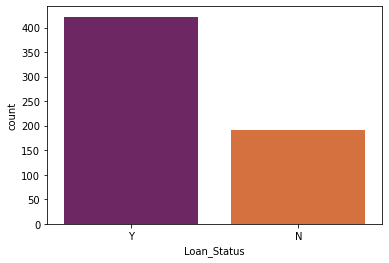

In [11]:
sns.countplot(df['Loan_Status'],palette = 'inferno',data=df);

****According to the Count Plot of "Loan_Status" column i can see "Y" shows the Approval and "N" give Disapproval of Loan in the Dataset.****

**Gender**

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

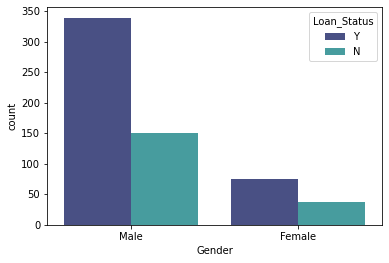

In [13]:
sns.countplot(df['Gender'],palette='mako',hue='Loan_Status',data=df);

****I can see that from the above graph Male has a strong Loan_Status rather than Female.****

**Married**

In [14]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

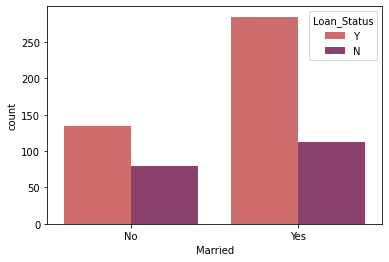

In [15]:
sns.countplot(df['Married'],palette='flare',hue='Loan_Status',data=df);

**** According to the above countplot i can watch Married Couples have a higher opportunity of Getting Loan rather than Unmarried ones.****

**Dependents**

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

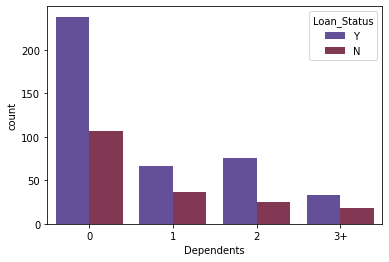

In [17]:
sns.countplot(df['Dependents'],palette='twilight',hue='Loan_Status',data=df);

**** From the above plot I can Analyze that "0" Dependents have a huge scope of ('345') Getting Loan rather than other Dependents.****

**Education**

In [18]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

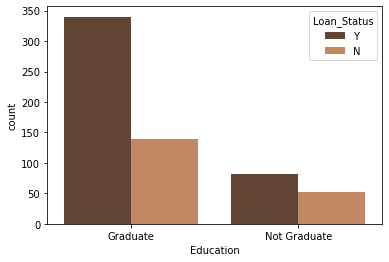

In [19]:
sns.countplot(df['Education'],palette='copper',hue='Loan_Status',data=df);

**** EDUCATION Graph Shows that there are more number of graduates than non graduates in this dataset.****

**Self_Employed**

In [20]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

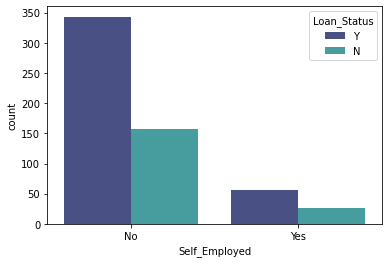

In [21]:
sns.countplot(df['Self_Employed'],palette='mako',hue='Loan_Status',data=df);

***** From the above count plot  i can analyze that "No" signifies 500 person and "Yes" says 82 person in these dataset.****

***** So in short we can say that it doesn’t matter whether the applicant is self employed or not.*****

**Loan_Amount_Term**

In [22]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '36.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '84.0'),
  Text(4, 0, '120.0'),
  Text(5, 0, '180.0'),
  Text(6, 0, '240.0'),
  Text(7, 0, '300.0'),
  Text(8, 0, '360.0'),
  Text(9, 0, '480.0')])

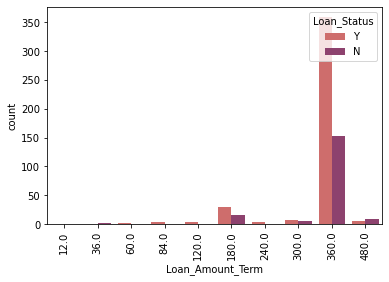

In [23]:
sns.countplot(df['Loan_Amount_Term'],palette='flare',hue='Loan_Status',data=df);
plt.xticks(rotation=90)

**Credit_History**

In [24]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

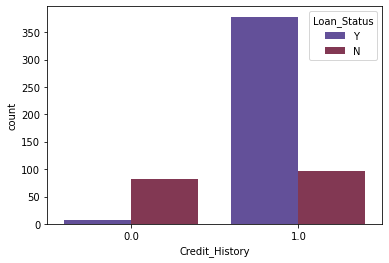

In [25]:
sns.countplot(df['Credit_History'],palette='twilight',hue='Loan_Status',data=df);

**** In the above plot i can say that Larger Percentage of people have a good credit history.****

**Property_Area**

In [26]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

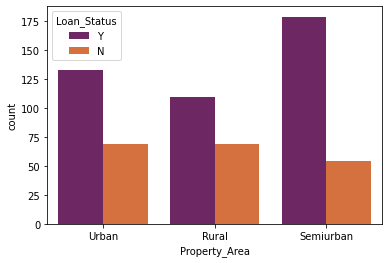

In [27]:
sns.countplot(df['Property_Area'],palette='inferno',hue='Loan_Status',data=df);

**** From the above count plot i can see that Semi-Urban peoples required Loan much than the remaining Urban & Rural Prpoerty Areas.****

## Filling the missing values

In [28]:
# filling the missing values of categorical columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# filling the missing values of continious columns
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***** As from the above dataset I can see that all the count values are not matching so in these dataset I use "fillna" code to fill all the missing values.****

### Replacing categorial columns into numerical values

In [30]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1},'Dependents':{0:0,1:1,2:2,'3+':3}},inplace=True)

In [31]:
df.drop('Loan_ID',inplace=True,axis=1)

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


**** According to the above code I replace all categorical columns into numerical values.****

## Distribution Plot

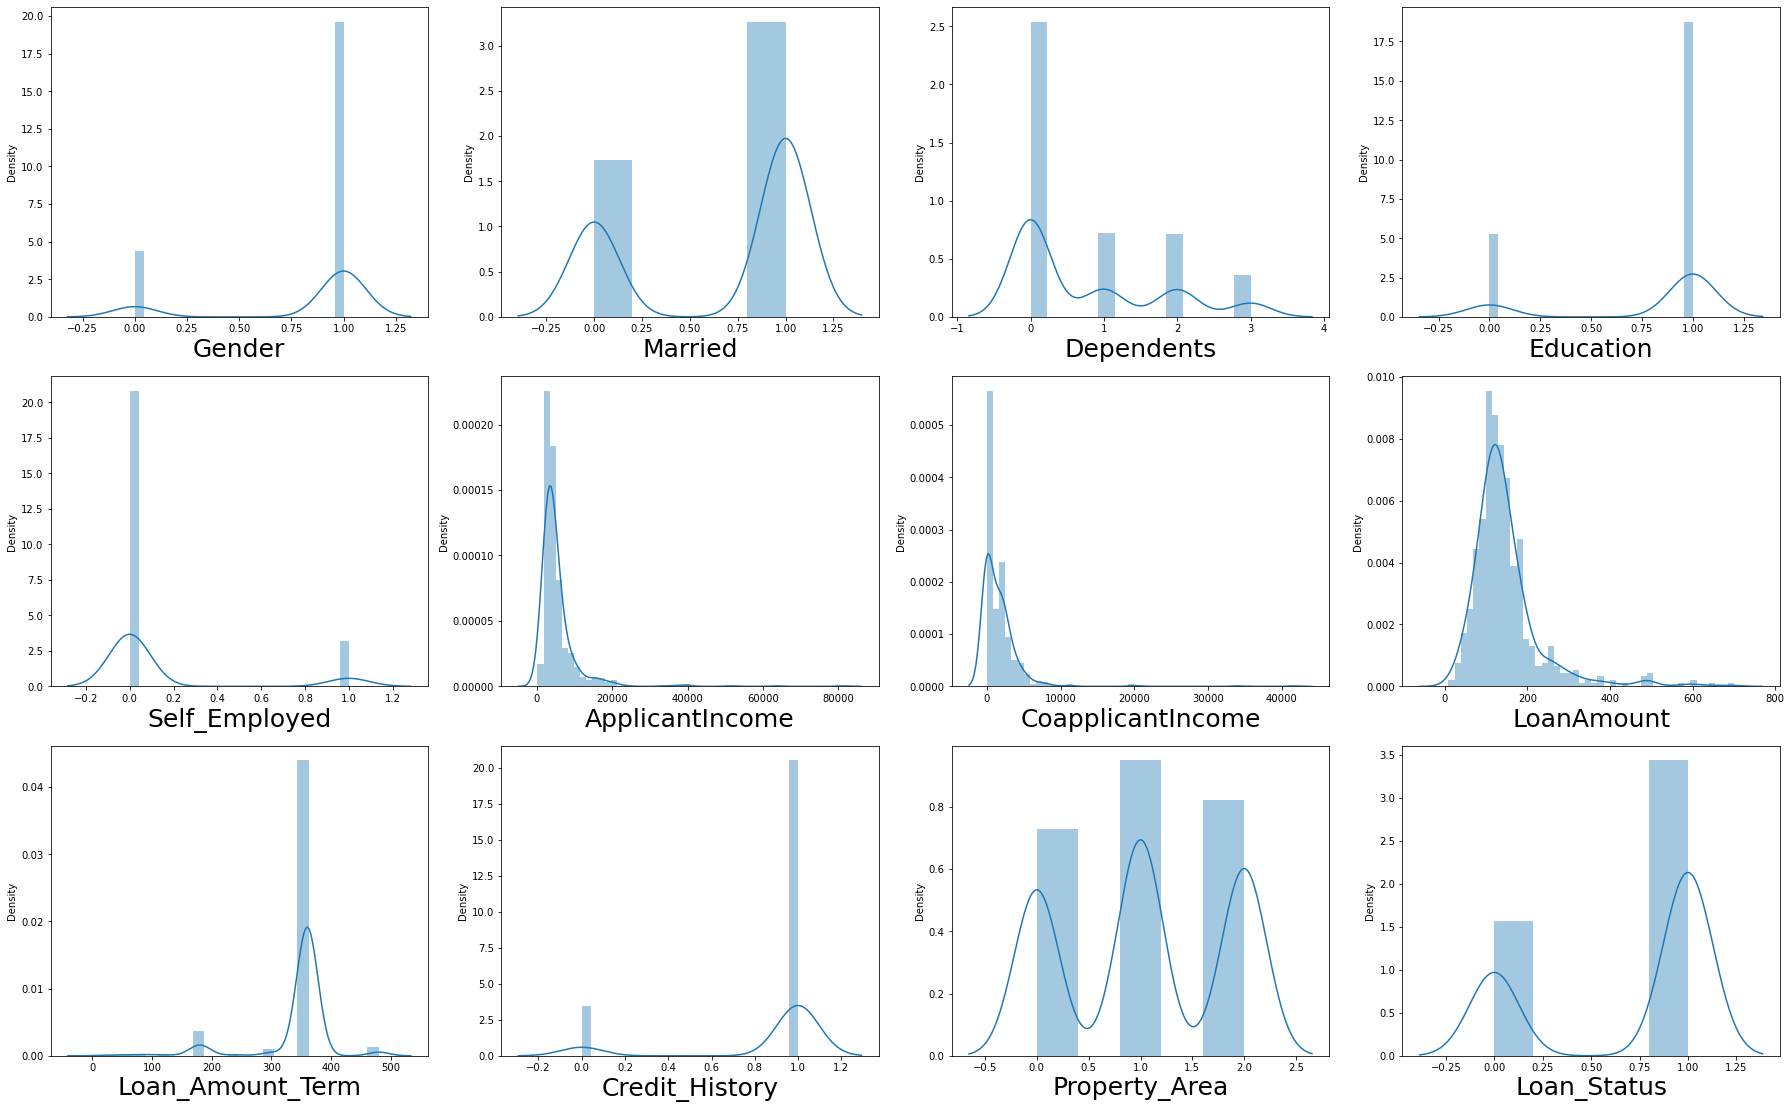

In [33]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

**** After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.****

### Replacing all the zero values from different columns

In [34]:
# Replacing categorial columns with mode
df['Self_Employed']=df['Self_Employed'].replace(0,df['Self_Employed'].mode()[0])
df['Property_Area']=df['Property_Area'].replace(0,df['Property_Area'].mode()[0])

# Replacing continous columns with mean
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

**** According to the Dataset these 3 columns (Self_Employed,Property_Area,CoapplicantIncome) have zero values which i have replace it.****

## Box Plot

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Self_Employed         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ApplicantIncome         AxesSubplot(0.125,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Credit_History          AxesSubplot(0.125,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

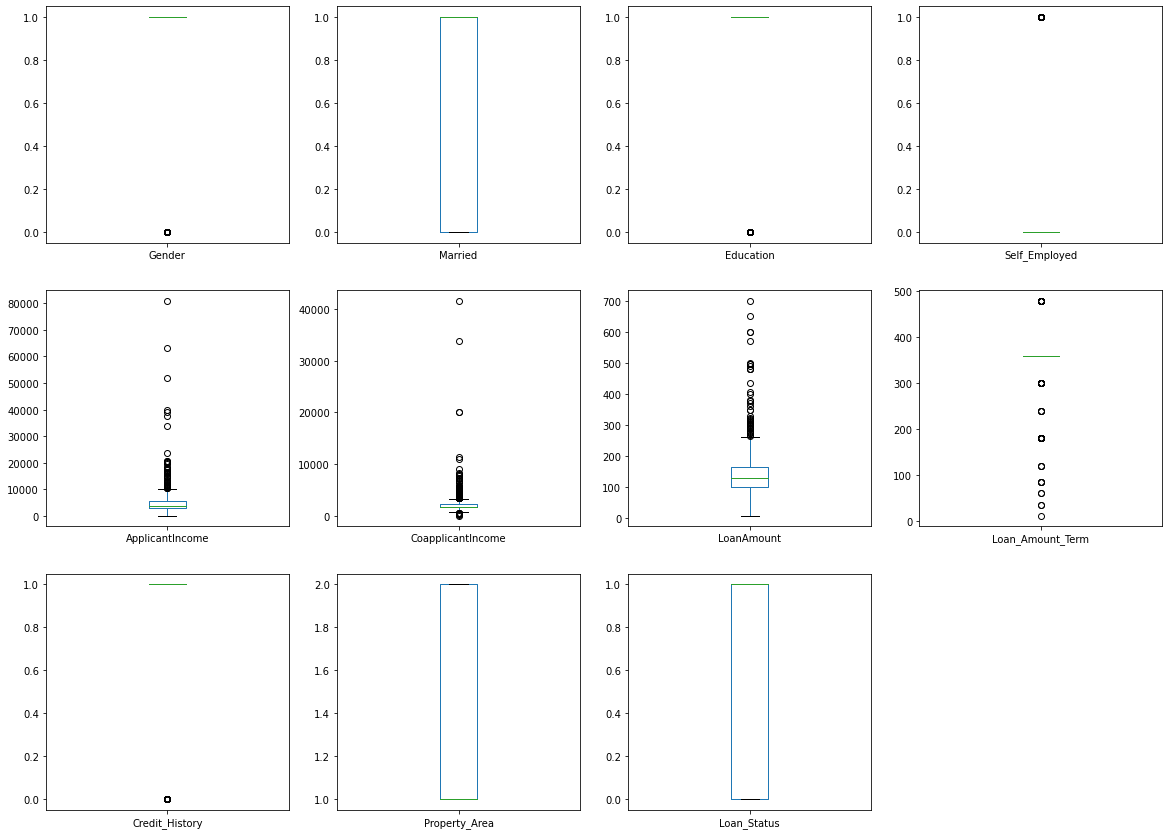

In [35]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

## Removing Outliers

## Z Score

In [36]:
z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.772496,0.129032,4649.770798,2125.815511,135.351558,342.478778,0.853990,1.329372,0.691002
std,0.388676,0.477295,0.419577,0.335521,2944.018096,1169.457218,56.320095,64.398591,0.353417,0.470385,0.462473
min,0.000000,0.000000,0.000000,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2873.000000,1621.245798,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3750.000000,1621.245798,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5503.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


In [37]:
df.shape

(589, 12)

****From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.****

****So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i will be using z score above to remove outliers.*****

****Clearly the boxplot indicates that all the variables contains outliers. Now we need to take care of the outliers.****

## Distribution Plot

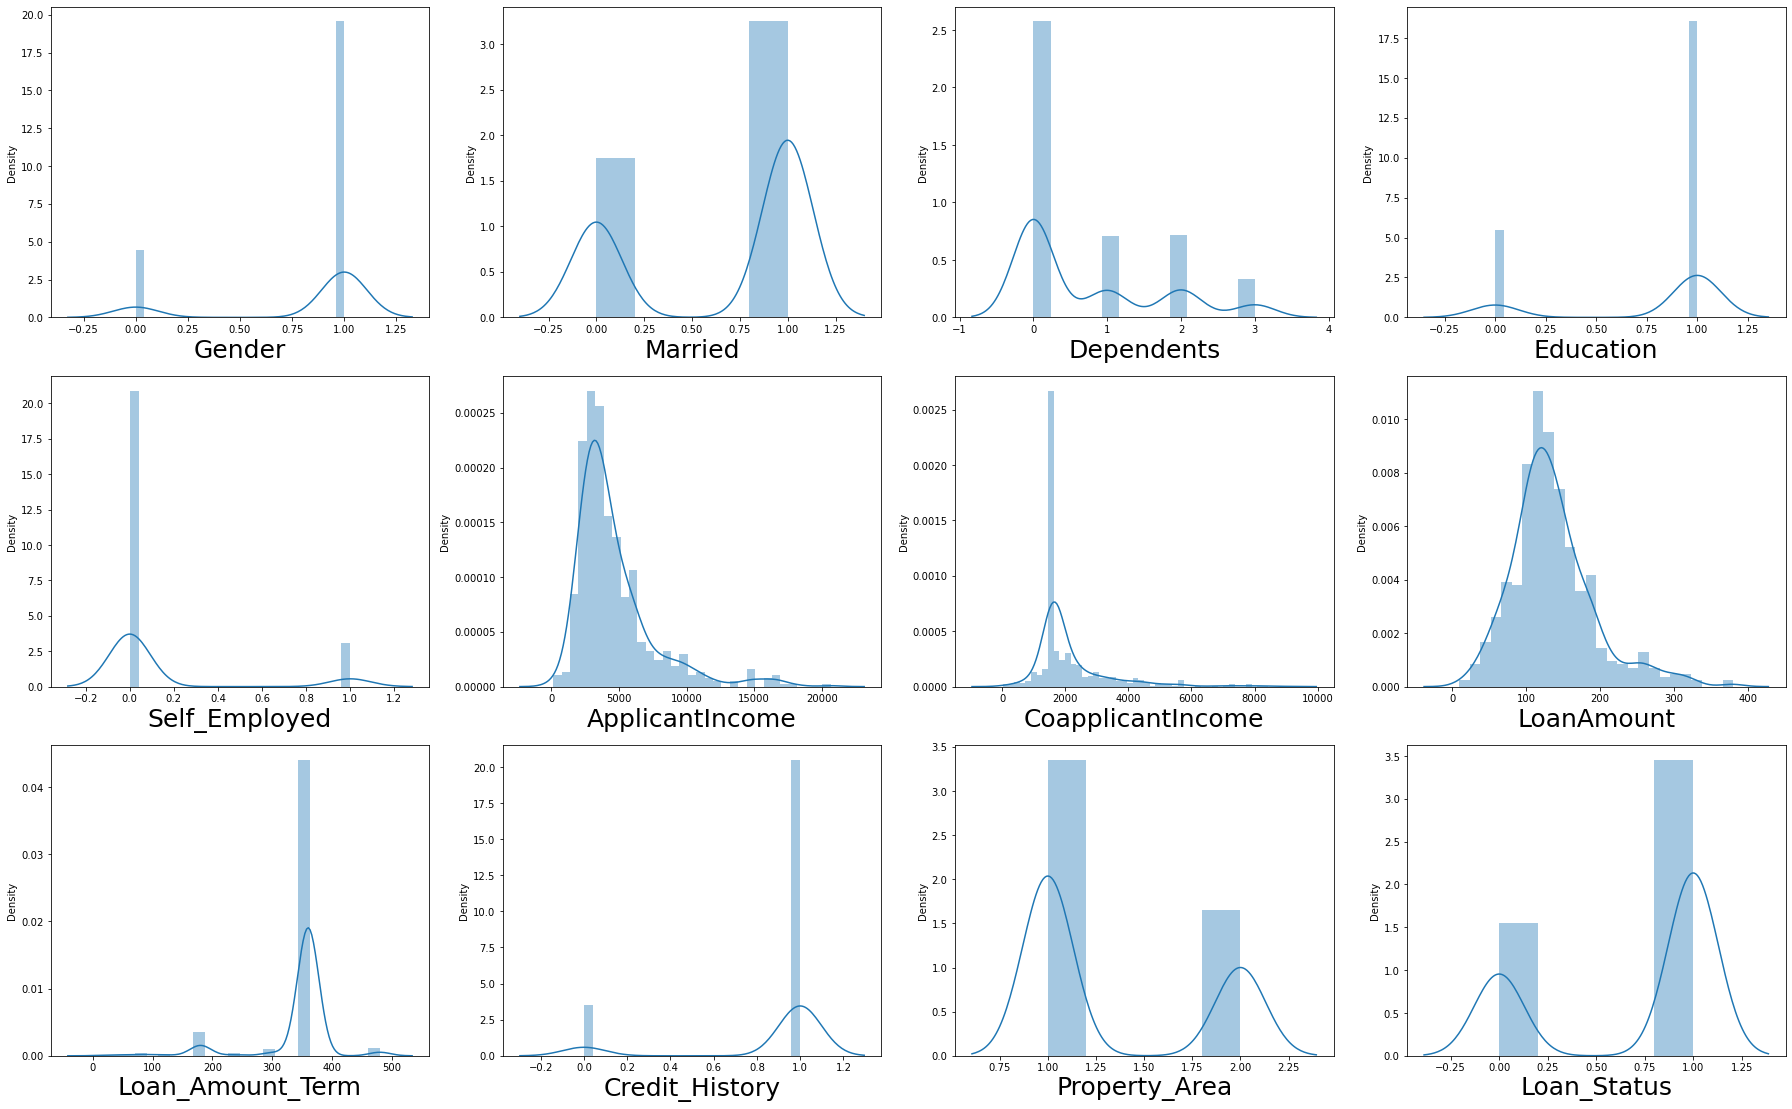

In [38]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

**** After Removing Outliers & Skewness I make Distribution Plot to understand how much my data is ready for Model Prediction.**** 

# Machine Learning

**Model Building**

In [40]:
# dividing features and label

x = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

### Separate response variable and features in x & y.

## StandardScaler

****The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.****

****Below I will use the StandardScaler to scale the data.****

In [41]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.47653262, -1.36353339, -0.72840172, ...,  0.27230588,
         0.41349021,  1.42691362],
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27230588,
         0.41349021, -0.70081327],
       [ 0.47653262,  0.73338872, -0.72840172, ...,  0.27230588,
         0.41349021,  1.42691362],
       ...,
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27230588,
         0.41349021,  1.42691362],
       [ 0.47653262,  0.73338872,  1.28109999, ...,  0.27230588,
         0.41349021,  1.42691362],
       [-2.09849225, -1.36353339, -0.72840172, ...,  0.27230588,
        -2.41843694, -0.70081327]])

***By Using Standard Scaler I have scaled the data in scaled one.***

## VIF - variance inflation factor

In [42]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.194146,Gender
1,1.298379,Married
2,1.174280,Dependents
3,1.070140,Education
4,1.075988,Self_Employed
5,1.468050,ApplicantIncome
6,1.292538,CoapplicantIncome
7,1.638362,LoanAmount
8,1.065707,Loan_Amount_Term
9,1.010630,Credit_History


**** By using Variance Inflation Factor(VIF) I can see that there is a strong relationship between all the Features and also the values are less than 5.****
**** This cumulative components values shows that if we want to be able to explain features properly, we need to get best features in our model.****

## Model Building

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

****Splitting the dataset into the Training set and Test set.****

****The data should be divided into train and test data.****

****I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.**** 

****I can set the random state of the split to ensure consistent results.****

## SAMPLING TECHNIQUES 

#### There are many sampling techniques like Random Sampling, Stratified Sampling etc. 
#### The major purpose is to improve the accuracy which can be obtained by hiding some portion of train data and running the model so that on an average the one that gives higher accuracy can be taken for test data.

## Logistic Regression

#### As here I wan’t to classify between the people who have taken loan or not I have used Logistic Regression.
#### Here is the code for Logistic Regression and Stratified Sampling.

In [44]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = log_reg.predict(x_test)

In [46]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [47]:
log_reg.score(x_test,y_test)

0.8108108108108109

In [48]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



### By using Logistic Regression I Get Accuracy Score : 81%

****After modelling Logistic Regression then my next step is to find Auc Score which will help me to make Roc_Auc Curve.****

****Below is the Auc Score:****

In [49]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.7349000206143064

****So, I get Auc Score From Logistic Regresion is 73.49%.****

## KNN

****After using Logistic Regression I use Knn Model to predict the loan_Status.****

****Therefore my first work is to use best feature method selection method which I will use with KNN model.****

### Using SelectKBest Method for best features selection

In [50]:
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(9,'Score'))

       Features_Name       Score
9     Credit_History  262.535101
1            Married    5.359961
3          Education    5.104883
7         LoanAmount    1.074146
10     Property_Area    0.917930
8   Loan_Amount_Term    0.313910
0             Gender    0.282758
2         Dependents    0.282620
4      Self_Employed    0.162130


#### So, by using Best Feature Method i can say that 'Credit History' is the main essential document to provide a loans to an individuals.
#### After then i will check remainings feilds of documentatation.

In [52]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [53]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[24, 25],
       [11, 88]], dtype=int64)

In [56]:
knn.score(x_test,y_test)

0.7567567567567568

In [57]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        49
           1       0.78      0.89      0.83        99

    accuracy                           0.76       148
   macro avg       0.73      0.69      0.70       148
weighted avg       0.75      0.76      0.74       148



### According to my perception of modelling KNN I got Accuracy Score : 76%.
### But this score can improve the accuracy  by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [58]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [59]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [60]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [61]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [62]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [64]:
y_pred = knn.predict(x_test)

In [65]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[24, 25],
       [ 6, 93]], dtype=int64)

In [66]:
knn.score(x_test,y_test)

0.7905405405405406

In [67]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61        49
           1       0.79      0.94      0.86        99

    accuracy                           0.79       148
   macro avg       0.79      0.71      0.73       148
weighted avg       0.79      0.79      0.77       148



#### By using Grid Search CV I improve the Accuracy Score : 79%

#### After modelling KNN then my next step is to find Auc Score which will help me to make Roc_Auc Curve.

#### Below is the Auc Score:

In [68]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.7145949288806432

#### So, I get Auc Score From KNN is 71.45%

## RandomForestClassifier

#### After using KNN I use RandomForestClassifier to predict the loan_Status.

In [69]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [70]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 6, 93]], dtype=int64)

In [71]:
rfc.score(x_test,y_test)

0.7972972972972973

In [72]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.51      0.62        49
           1       0.79      0.94      0.86        99

    accuracy                           0.80       148
   macro avg       0.80      0.72      0.74       148
weighted avg       0.80      0.80      0.78       148



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 80%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [73]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


In [74]:
rfc = grd.best_estimator_

In [75]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=13)

In [76]:
y_pred = rfc.predict(x_test)

In [77]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [78]:
rfc.score(x_test,y_test)

0.8108108108108109

In [79]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



#### By using Grid Search CV I improve the Accuracy Score : 81%¶

#### After modelling RandomForestClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [80]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7349000206143064

#### So, I get Auc Score From KNN is 73.50%

## Decision Tree Classifier

### After using Random Forest Classifier I use Decision Tree Classifier to predict the loan_Status.

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [82]:
y_pred = log_reg.predict(x_test)

In [83]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [84]:
dtc.score(x_test,y_test)

0.7027027027027027

In [86]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 81%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [87]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [88]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [89]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [90]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [92]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [93]:
y_pred = dtc.predict(x_test)

In [94]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [95]:
dtc.score(x_test,y_test)

0.8108108108108109

In [96]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



#### By using Grid Search CV I improve the Accuracy Score : 81%
#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:    

In [97]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7349000206143064

#### So, I get Auc Score From Decision Tree Classifier is 73.50%

## Roc_Auc Curve 

#### In Machine Learning, performance measurement is an essential task. 
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve. 
#### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 
#### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

In [2]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/2000/1*q8VdYJGRO9RWbLi1TVeTuQ.jpeg")

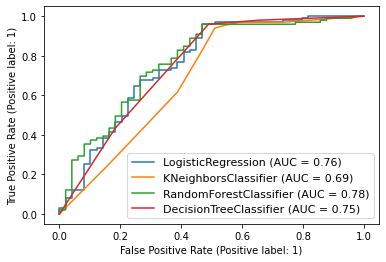

In [98]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Summary:
#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my Roc_Auc Curve I can say that RandomForestClassifier with 78% is the  best predictive model in this Dataset.

## Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned Random Forest has the highest Best Score (0.81).
### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.

### I’ll briefly discuss how I approached this problem of predicting loan defaults.

#### a)I had Loan Prdiction dataste from which I had to extract information.
#### b)I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c)After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.
#### d)I did exploratory data analysis on main data frame and tried to remove all the possible outliers.
#### e)Based on visulization  knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.
#### f)I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### g)After from all these i split the Features & Labels into 2 parts.
#### h)On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree and KNN.

## Saving the Best Model

In [99]:
import pickle

In [100]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### From the Above Coding I Get best model Random Forest Accuracy Score.
### So I use Random Forest Classifier to Save the Best Model.